In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('domain_realestate.csv')

df.head(5)

,Address_URL,Price,Address,Beds,Baths,Parking,Size,Type
0,https://www.domain.com.au/8e-47-herdsman-parad...,"Offers $470,000+","8E/47 Herdsman Parade, \nWEMBLEY WA 6014",1\nBed,1\nBath,1\nParking,69m²,Apartment / Unit / Flat
1,https://www.domain.com.au/lot-1668-bushland-cr...,"$816,316","Lot 1668 Bushland Crescent, \nBANYA QLD 4551",4\nBeds,2\nBaths,2\nParking,402m²,New house and land
2,https://www.domain.com.au/lot-1668-bushland-cr...,"$803,491","Lot 1668 Bushland Crescent, \nBANYA QLD 4551",4\nBeds,2\nBaths,2\nParking,402m²,New house and land
3,https://www.domain.com.au/lot-1920-coochin-cou...,"$944,404","Lot 1920 Coochin Court, \nWHITE ROCK QLD 4306",4\nBeds,2\nBaths,2\nParking,512m²,New house and land
4,https://www.domain.com.au/lot-1920-coochin-cou...,"$949,119","Lot 1920 Coochin Court, \nWHITE ROCK QLD 4306",4\nBeds,2\nBaths,2\nParking,512m²,New house and land


In [ ]:
df.duplicated()

<bound method DataFrame.duplicated of                                              Address_URL              Price  \
0      https://www.domain.com.au/8e-47-herdsman-parad...  Offers $470,000+    
1      https://www.domain.com.au/lot-1668-bushland-cr...          $816,316    
2      https://www.domain.com.au/lot-1668-bushland-cr...          $803,491    
3      https://www.domain.com.au/lot-1920-coochin-cou...          $944,404    
4      https://www.domain.com.au/lot-1920-coochin-cou...          $949,119    
...                                                  ...                ...   
47395  https://www.domain.com.au/logan-reserve-qld-41...     From $950 000    
47396  https://www.domain.com.au/glenvale-qld-4350-20...     From $846 000    
47397  https://www.domain.com.au/white-rock-qld-4306-...     From $930 000    
47398  https://www.domain.com.au/woodford-qld-4514-20...     From $940 000    
47399  https://www.domain.com.au/redbank-plains-qld-4...     From $990 000    

             

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827868 entries, 0 to 1827867
Data columns (total 20 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Property ID                 float64
 1   Sale counter                int64  
 2   Download date / time        object 
 3   Property name               object 
 4   Property unit number        object 
 5   Property house number       object 
 6   Property street name        object 
 7   Property locality           object 
 8   Property post code          float64
 9   Area                        float64
 10  Area type                   object 
 11  Contract date               object 
 12  Settlement date             object 
 13  Purchase price              int64  
 14  Zoning                      object 
 15  Nature of property          object 
 16  Primary purpose             object 
 17  Strata lot number           float64
 18  Dealing number              object 
 19  Property legal descri

In [17]:
df.isna().sum()

Sale counter                       0
Property house number          39390
Property street name             493
Property locality                  5
Property post code               131
Area                          429118
Area type                     429090
Contract date                    175
Settlement date                    1
Purchase price                     0
Zoning                        762103
Nature of property                 0
Primary purpose                  286
Dealing number                     0
Property legal description        19
dtype: int64

In [8]:
df = df.drop(columns=['Property name', 'Property unit number', 'Strata lot number', 'Download date / time', 'Property ID'])

In [18]:
df.head(5)

,Sale counter,Property house number,Property street name,Property locality,Property post code,Area,Area type,Contract date,Settlement date,Purchase price,Zoning,Nature of property,Primary purpose,Dealing number,Property legal description
0,1,154,Sanctuary Rd,Ellalong,2325.0,314100.0,H,2024-06-19,2024-06-25,1800000,RU2,V,Vacant land,AU186093,1/185087
1,2,8 A,Redgum Rd,Paxton,2325.0,5280.0,M,2024-05-20,2024-06-27,1150000,R5,R,Residence,AU194908,31/1144473
2,3,46,Millbrook Rd,Cliftleigh,2321.0,450.0,M,2024-05-29,2024-06-26,710000,R2,R,Residence,AU189616,614/1242604
3,4,12,Vincent St,Cessnock,2325.0,1100.0,M,2024-05-14,2024-06-25,1250000,E2,3,Commercial,AU184079,1/727362
4,5,9,Cessnock Rd,Branxton,2335.0,1113.0,M,2024-04-04,2024-06-27,755000,R3,R,Residence,AU194943,1/3/8123


In [20]:
df_clean = df.dropna()

## Data Preprocessing

In [23]:
def convert_area(row):
    if row['Area type'] == 'H':
        return row['Area'] * 10000
    elif row['Area type'] == 'M':
        return row['Area']
    else:
        return None  

In [26]:
df_clean['Area'] = df.apply(convert_area, axis=1)

C:\Users\quock\AppData\Local\Temp\ipykernel_30400\560958459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Area'] = df.apply(convert_area, axis=1)


In [33]:
df_clean['Area'] /= 1e6

In [28]:
df_clean = df_clean.drop(columns=['Area type'])

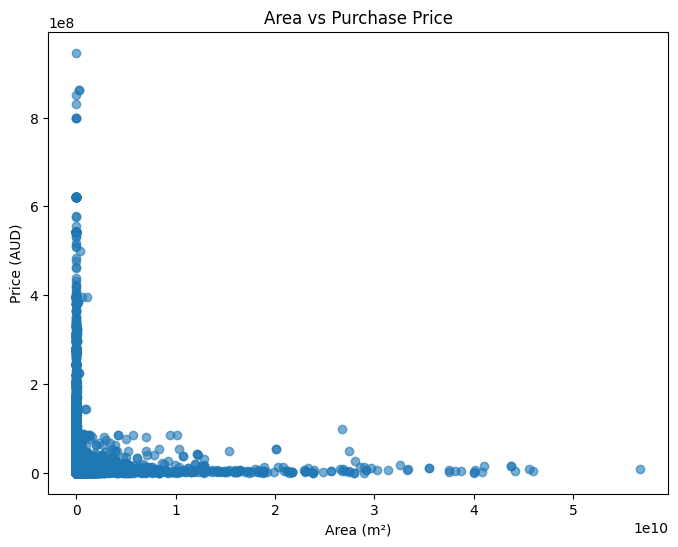

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_clean['Area'], df_clean['Purchase price'], alpha=0.6)
plt.xlabel('Area (m²)')
plt.ylabel('Price (AUD)')
plt.title('Area vs Purchase Price')
plt.show()

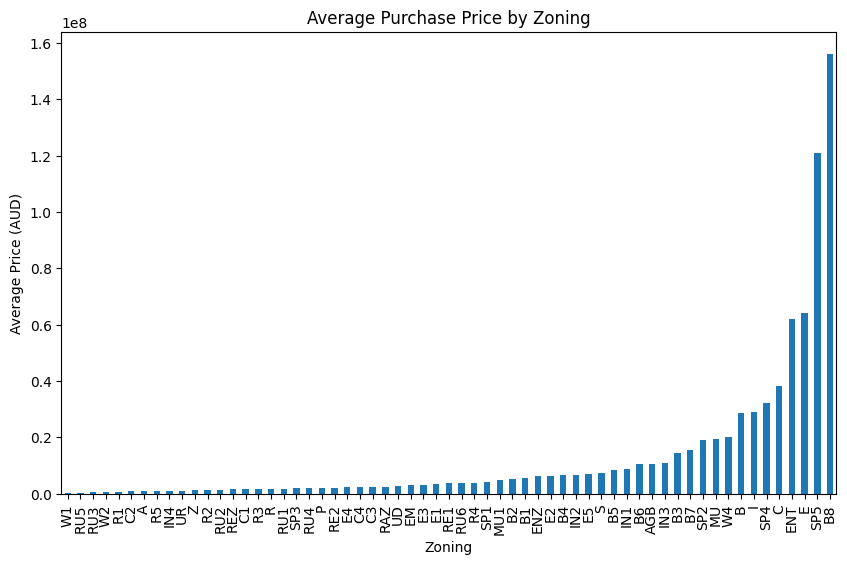

In [37]:
avg_price_zoning = df_clean.groupby('Zoning')['Purchase price'].mean().sort_values()

plt.figure(figsize=(10,6))
avg_price_zoning.plot(kind='bar')
plt.ylabel('Average Price (AUD)')
plt.title('Average Purchase Price by Zoning')
plt.show()

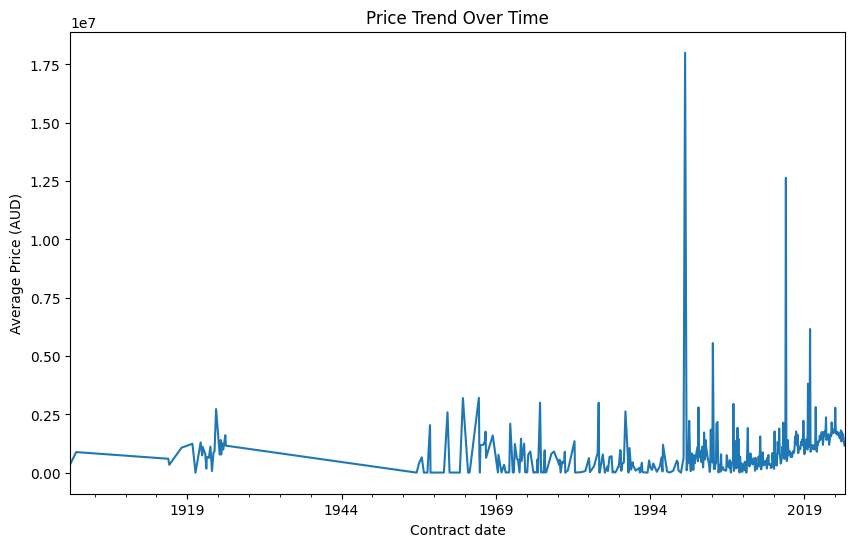

In [38]:
df_clean['Contract date'] = pd.to_datetime(df_clean['Contract date'])

plt.figure(figsize=(10,6))
df_clean.groupby(df_clean['Contract date'].dt.to_period('M'))['Purchase price'].mean().plot()
plt.ylabel('Average Price (AUD)')
plt.title('Price Trend Over Time')
plt.show()

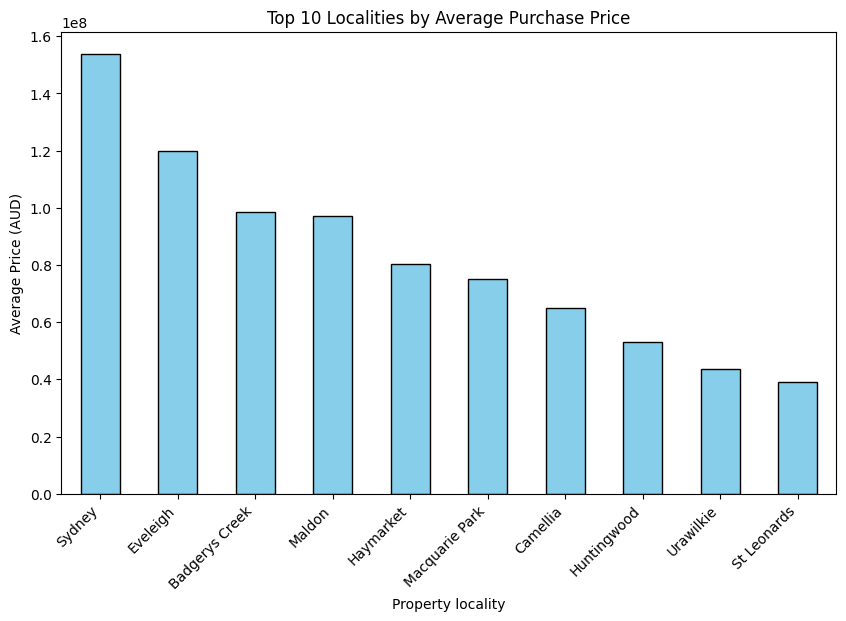

In [39]:
avg_price_locality = (
    df_clean.groupby('Property locality')['Purchase price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
avg_price_locality.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Average Price (AUD)')
plt.title('Top 10 Localities by Average Purchase Price')
plt.xticks(rotation=45, ha='right')
plt.show()

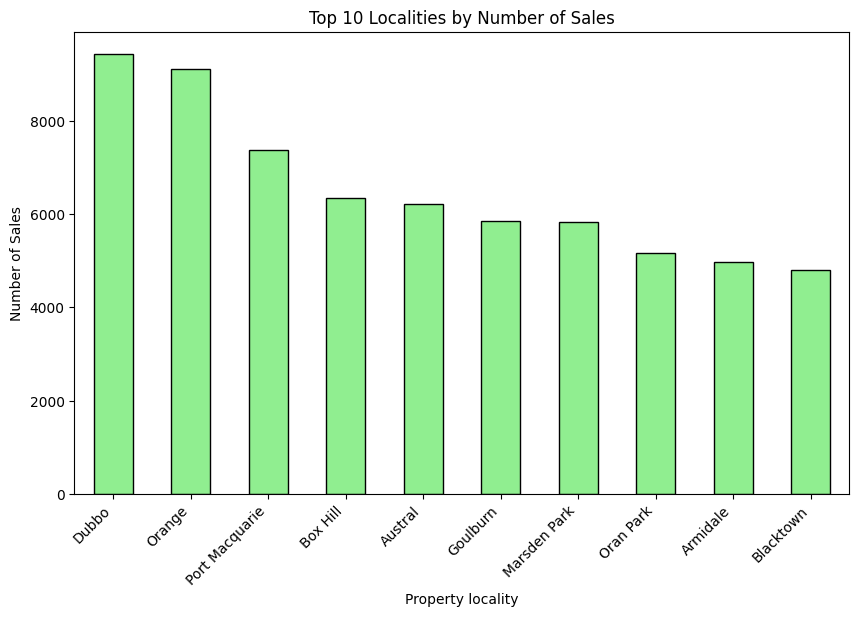

In [40]:
count_locality = (
    df_clean['Property locality']
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10,6))
count_locality.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.ylabel('Number of Sales')
plt.title('Top 10 Localities by Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

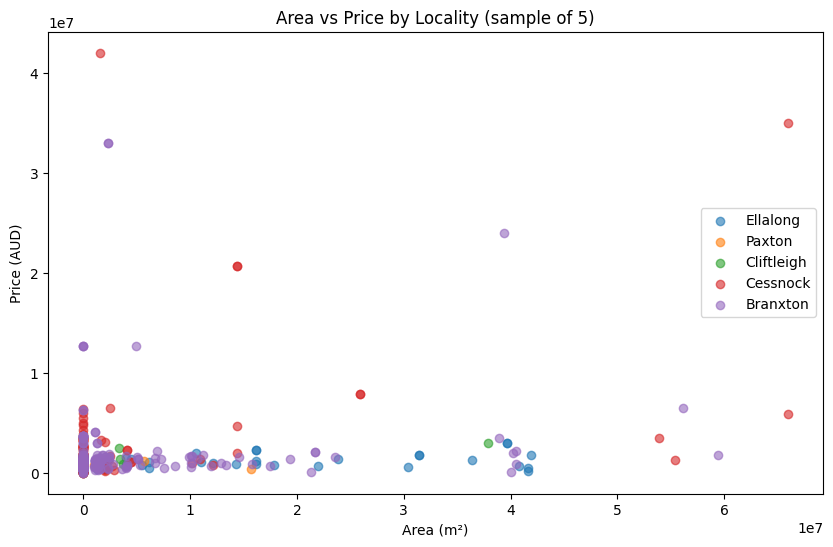

In [ ]:
plt.figure(figsize=(10,6))
for loc in df_clean['Property locality'].unique()[:5]:
    subset = df_clean[df_clean['Property locality'] == loc]
    plt.scatter(subset['Area'], subset['Purchase price'], label=loc, alpha=0.6)

plt.xlabel('Area (m²)')
plt.ylabel('Price (AUD)')
plt.title('Area vs Price by Locality (sample of 5)')
plt.legend()
plt.show()